# Prepare and load dataset

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import cv2


from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import skimage
import warnings
warnings.filterwarnings('ignore')


In [3]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(3)




# Prepare and load data Test

In [4]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (140,160), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(3)


# Create the base model from the pre-trained model Xception

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

                                            

In [6]:
x_train = preprocess_input(np.array(x_train,dtype=np.float32))
x_test = preprocess_input(np.array(x_test,dtype=np.float32))
y_train = np.array(y_train,dtype=np.uint8)
y_test = np.array(y_test,dtype=np.uint8)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [8]:
base_model = Xception(include_top=False,weights='imagenet',input_shape=(x_train[0].shape),pooling='avg')

In [9]:
base_model.trainable = False

In [10]:
flatten_layer = layers.Flatten()
dropout_layer_1 = layers.Dropout(0.5)

dense_layer_1 = layers.Dense(4096, activation='relu')
dropout_layer_2 = layers.Dropout(0.5)

dense_layer_2 = layers.Dense(1024, activation='relu')
dropout_layer_3 = layers.Dropout(0.3)
prediction_layer = layers.Dense(4, activation='softmax')

In [11]:
model = Sequential([
    base_model,
    flatten_layer,
    dropout_layer_1,
    dense_layer_1,
    dropout_layer_2,
    dense_layer_2,
    dropout_layer_3,
    prediction_layer
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4096)              8392704   
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0

In [13]:
x_train.shape

(8463, 160, 140, 3)

# Train the model

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

history = model.fit(x_train,y_train, validation_data= (x_valid,y_valid),  
                              epochs=80,batch_size=120)


Epoch 1/80
71/71 [==============================] - 30s 325ms/step - loss: 1.4784 - accuracy: 0.3654 - val_loss: 1.0862 - val_accuracy: 0.5268
Epoch 2/80
71/71 [==============================] - 20s 282ms/step - loss: 1.1243 - accuracy: 0.5038 - val_loss: 1.0309 - val_accuracy: 0.5736
Epoch 3/80
71/71 [==============================] - 19s 273ms/step - loss: 1.0598 - accuracy: 0.5374 - val_loss: 0.9687 - val_accuracy: 0.6312
Epoch 4/80
71/71 [==============================] - 19s 267ms/step - loss: 1.0023 - accuracy: 0.5701 - val_loss: 0.8938 - val_accuracy: 0.6439
Epoch 5/80
71/71 [==============================] - 19s 269ms/step - loss: 0.9718 - accuracy: 0.5889 - val_loss: 0.8810 - val_accuracy: 0.6499
Epoch 6/80
71/71 [==============================] - 19s 272ms/step - loss: 0.9462 - accuracy: 0.6045 - val_loss: 0.8706 - val_accuracy: 0.6539
Epoch 7/80
71/71 [==============================] - 19s 275ms/step - loss: 0.9143 - accuracy: 0.6179 - val_loss: 0.8366 - val_accuracy: 0.6687

# plot the loss and accuracy of the model

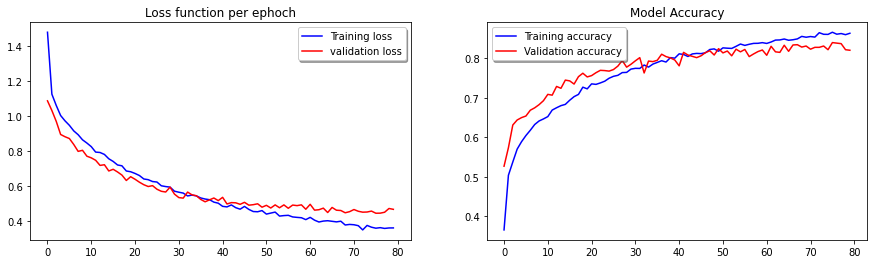

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss function per ephoch')
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Model Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

# train & test loss and accuracy

In [18]:
train_loss, train_acc= model.evaluate(x_train,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

265/265 [==============================] - 17s 64ms/step - loss: 0.1360 - accuracy: 0.9826
train acc: 0.9826302528381348
train loss: 0.13602985441684723


In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

3/3 [==============================] - 0s 60ms/step - loss: 1.8398 - accuracy: 0.6761
test acc: 0.6760563254356384
test loss: 1.839812994003296
